# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy.stats as stats
from scipy.stats import t
import math
colors_palette = ["#024059", "#0388A6", "#8C031C"]
sns.set_palette(sns.color_palette(colors_palette))

# Functions

In [ ]:
def confidence_intervals(stats, confidence_level = .95, df = 9, k = 10):

  alpha = (1 - confidence_level) / 2
  quantile_95 = t.ppf(1 - alpha, df)

  confidence_intervals = []
  for stat in stats:
    mean = np.mean(stat)
    std = np.std(stat)
    ci = {'Inf': mean - std * quantile_95 /math.sqrt(k),
          'Mean': mean,
          'Sup': mean + std * quantile_95 /math.sqrt(k)}
    confidence_intervals.append(ci)

  return(confidence_intervals)


# Confidence Intervals for the Normal vs Abnormal Model

In [ ]:
f = open('./Metrics/metrics_cv_nor_abn_model.json')
norm_abno = json.load(f)
f.close()

In [ ]:
# Get confusion matrix
confusion_matrices = []
for fold in norm_abno['folds']:
  confusion_matrices.append(np.array(fold['conf_matrix']).T)

## Confidence Interval for the Error

In [ ]:
# Get error rates for each fold
error_N = []
error_A = []
for conf_mat in confusion_matrices:
  error_N.append(conf_mat[0][1]/(conf_mat[0][1] + conf_mat[0][0]))
  error_A.append(conf_mat[1][0]/(conf_mat[1][0] + conf_mat[1][1]))

In [ ]:
conf_error_N, conf_error_A = confidence_intervals([error_N, error_A])

print(f'The confidence interval for the mean percentage error of the normal class with confidence 95% is:\n{conf_error_N}')
print(f'The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:\n{conf_error_A}')

The confidence interval for the mean percentage error of the normal class with confidence 95% is:
{'Inf': 0.006673822895830436, 'Mean': 0.009994855551746696, 'Sup': 0.013315888207662954}
The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:
{'Inf': 0.14603957076539364, 'Mean': 0.23008788466954955, 'Sup': 0.31413619857370545}


## Confidence Interval for the Precision

In [ ]:
# Get error rates for each fold
precision_N = []
precision_A = []
for conf_mat in confusion_matrices:
  precision_N.append(conf_mat[0][0]/(conf_mat[1][0] + conf_mat[0][0]))
  precision_A.append(conf_mat[1][1]/(conf_mat[0][1] + conf_mat[1][1]))

In [ ]:
conf_precision_N, conf_precision_A = confidence_intervals([precision_N, precision_A])

print(f'The confidence interval for the mean percentage error of the normal class with confidence 95% is:\n{conf_precision_N}')
print(f'The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:\n{conf_precision_A}')

The confidence interval for the mean percentage error of the normal class with confidence 95% is:
{'Inf': 0.9712976278928871, 'Mean': 0.97878365055005, 'Sup': 0.9862696732072129}
The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:
{'Inf': 0.8590382974328163, 'Mean': 0.8842939890956929, 'Sup': 0.9095496807585695}


## Confidence Interval for the Recall

In [ ]:
# Get error rates for each fold
recall_N = []
recall_A = []
for conf_mat in confusion_matrices:
  recall_N.append(conf_mat[0][0]/(conf_mat[0][1] + conf_mat[0][0]))
  recall_A.append(conf_mat[1][1]/(conf_mat[1][0] + conf_mat[1][1]))

In [ ]:
conf_recall_N, conf_recall_A = confidence_intervals([recall_N, recall_A])

print(f'The confidence interval for the mean percentage error of the normal class with confidence 95% is:\n{conf_recall_N}')
print(f'The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:\n{conf_recall_A}')

The confidence interval for the mean percentage error of the normal class with confidence 95% is:
{'Inf': 0.986684111792337, 'Mean': 0.9900051444482532, 'Sup': 0.9933261771041694}
The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:
{'Inf': 0.6858638014262947, 'Mean': 0.7699121153304506, 'Sup': 0.8539604292346065}


# Confidence Intervals for the Bagging Model

In [ ]:
f = open('./Metrics/bagging_cv.json')
bagging = json.load(f)
f.close()

In [ ]:
# Get confusion matrix
confusion_matrices = []
for fold in bagging:
  confusion_matrices.append(np.array(fold['conf_matrix']).T)

## Confidence Intervals for the Error

In [ ]:
error_N = []
error_V = []
error_S = []
for conf_mat in confusion_matrices:
  error_N.append((conf_mat[0][1]+ conf_mat[0][2])/(conf_mat[0][2] + conf_mat[0][1] + conf_mat[0][0]))
  error_V.append((conf_mat[1][0]+ conf_mat[1][2])/(conf_mat[1][2] + conf_mat[1][1] + conf_mat[1][0]))
  error_S.append((conf_mat[2][0]+ conf_mat[2][1])/(conf_mat[2][2] + conf_mat[2][1] + conf_mat[2][0]))

In [ ]:
conf_error_N, conf_error_V, conf_error_S = confidence_intervals([error_N, error_V, error_S])

print(f'The confidence interval for the mean percentage error of the normal class with confidence 95% is:\n{conf_error_N}')
print(f'The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:\n{conf_error_V}')
print(f'The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:\n{conf_error_S}')

The confidence interval for the mean percentage error of the normal class with confidence 95% is:
{'Inf': 0.005065797579022469, 'Mean': 0.029214404296780867, 'Sup': 0.05336301101453926}
The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:
{'Inf': 0.319931911763137, 'Mean': 0.42686362069787076, 'Sup': 0.5337953296326046}
The confidence interval for the mean percentage error of the abnormal class with confidence 95% is:
{'Inf': 0.2915703204812004, 'Mean': 0.38677487247326503, 'Sup': 0.48197942446532965}


## Confidence Intervals for the Precision

In [ ]:
precision_N = []
precision_V = []
precision_S = []
for conf_mat in confusion_matrices:
  precision_N.append(conf_mat[0][0]/(conf_mat[2][0] + conf_mat[1][0] + conf_mat[0][0]))
  precision_V.append(conf_mat[1][1]/(conf_mat[2][1] + conf_mat[1][1] + conf_mat[0][1]))
  precision_S.append(conf_mat[2][2]/(conf_mat[2][2] + conf_mat[1][2] + conf_mat[0][2]))

In [ ]:
conf_precision_N, conf_precision_V, conf_precision_S = confidence_intervals([precision_N, precision_V, precision_S])

print(f'The confidence interval for the precision of the N class with confidence 95% is:\n{conf_precision_N}')
print(f'The confidence interval for the precision of the V class with confidence 95% is:\n{conf_precision_V}')
print(f'The confidence interval for the precision of the S class with confidence 95% is:\n{conf_precision_S}')

The confidence interval for the precision of the normal class with confidence 95% is:
{'Inf': 0.9856390594147243, 'Mean': 0.9887855909425605, 'Sup': 0.9919321224703966}
The confidence interval for the precision of the abnormal class with confidence 95% is:
{'Inf': 0.60106381134041, 'Mean': 0.6776620673907804, 'Sup': 0.7542603234411508}
The confidence interval for the precision of the abnormal class with confidence 95% is:
{'Inf': 0.31959968465418276, 'Mean': 0.4214497646373566, 'Sup': 0.5232998446205305}


## Confidence Intervals for the Recall

In [ ]:
recall_N = []
recall_V = []
recall_S = []
for conf_mat in confusion_matrices:
  recall_N.append(conf_mat[0][0]/(conf_mat[0][2] + conf_mat[0][1] + conf_mat[0][0]))
  recall_V.append(conf_mat[1][1]/(conf_mat[1][2] + conf_mat[1][1] + conf_mat[1][0]))
  recall_S.append(conf_mat[2][2]/(conf_mat[2][2] + conf_mat[2][1] + conf_mat[2][0]))

In [ ]:
conf_recall_N, conf_recall_V, conf_recall_S = confidence_intervals([recall_N, recall_V, recall_S])

print(f'The confidence interval for the recall of the normal class with confidence 95% is:\n{conf_recall_N}')
print(f'The confidence interval for the recall of the abnormal class with confidence 95% is:\n{conf_recall_V}')
print(f'The confidence interval for the recall of the abnormal class with confidence 95% is:\n{conf_recall_S}')

The confidence interval for the recall of the normal class with confidence 95% is:
{'Inf': 0.9466369889854607, 'Mean': 0.9707855957032191, 'Sup': 0.9949342024209775}
The confidence interval for the recall of the abnormal class with confidence 95% is:
{'Inf': 0.46620467036739527, 'Mean': 0.573136379302129, 'Sup': 0.6800680882368628}
The confidence interval for the recall of the abnormal class with confidence 95% is:
{'Inf': 0.5180205755346703, 'Mean': 0.613225127526735, 'Sup': 0.7084296795187996}


# General Metric

In [ ]:
# Get confusion matrix
confusion_matrices = []
for fold in bagging:
  confusion_matrices.append(np.array(fold['conf_matrix']).T)

In [ ]:
sum_confusion_matrix = np.sum(confusion_matrices, axis=0)
sum_along_rows = np.sum(sum_confusion_matrix, axis=1)
sum_tot = np.sum(sum_along_rows, axis = 0)

In [ ]:
mean_precision_N = conf_precision_N['Mean']
mean_precision_V = conf_precision_V['Mean']
mean_precision_S = conf_precision_S['Mean']

In [ ]:
total_precision = (mean_precision_N * sum_along_rows[0] + mean_precision_V * sum_along_rows[1] + mean_precision_S * sum_along_rows[2]) / sum_tot
print(f'The total precision of the model is {total_precision}')

The total precision of the model is 0.9471888659633202


In [ ]:
total_precision_abnormal = (mean_precision_V * sum_along_rows[1] + mean_precision_S * sum_along_rows[2]) / (sum_along_rows[1] + sum_along_rows[2])
print(f'The total precision for the abnormal samples is {total_precision_abnormal}')

The total precision for the abnormal samples is 0.5736488402192523


# Plots

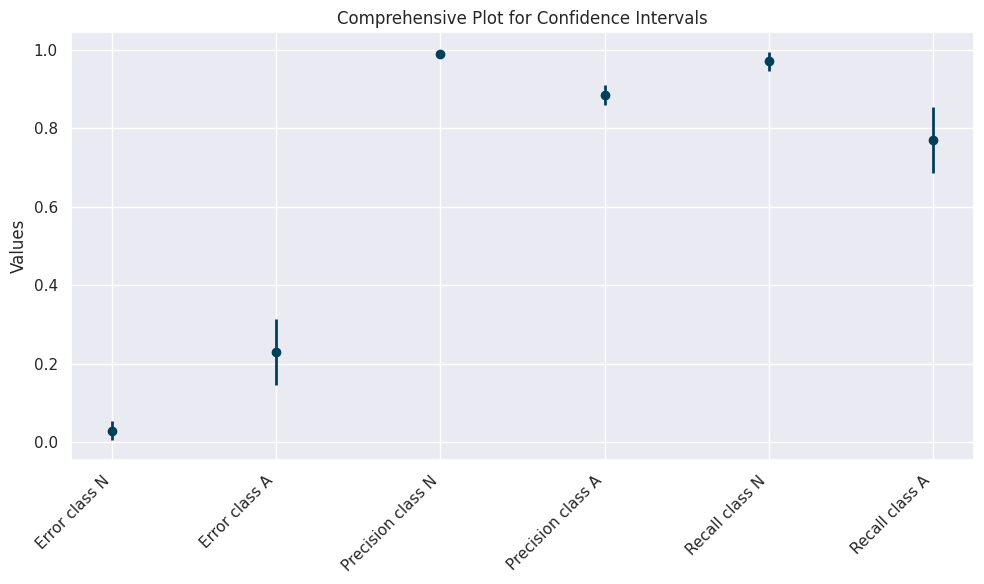

In [ ]:
cconfidence_intervals = [conf_error_N, conf_error_A, conf_precision_N, conf_precision_A, conf_recall_N, conf_recall_A]
labels = ['Error class N', 'Error class A', 'Precision class N', 'Precision class A', 'Recall class N', 'Recall class A']

# Plot all six intervals in a single plot with labels on the x-axis
fig, ax = plt.subplots(figsize=(10, 6))

x_positions = range(len(confidence_intervals))
for i, (conf_interval, label) in enumerate(zip(confidence_intervals, labels)):
    ax.scatter([i], [conf_interval['Mean']], color=colors_palette[0], marker='o')
    ax.vlines([i], conf_interval['Inf'], conf_interval['Sup'], color=colors_palette[0], linewidth=2)

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate and adjust the alignment for better visibility
ax.set_title('Comprehensive Plot for Confidence Intervals')
ax.set_ylabel('Values')
plt.tight_layout()
plt.grid(True)

#plt.show()
plt.savefig("plots/NvsAConfidenceIntervals.png", dpi=300)

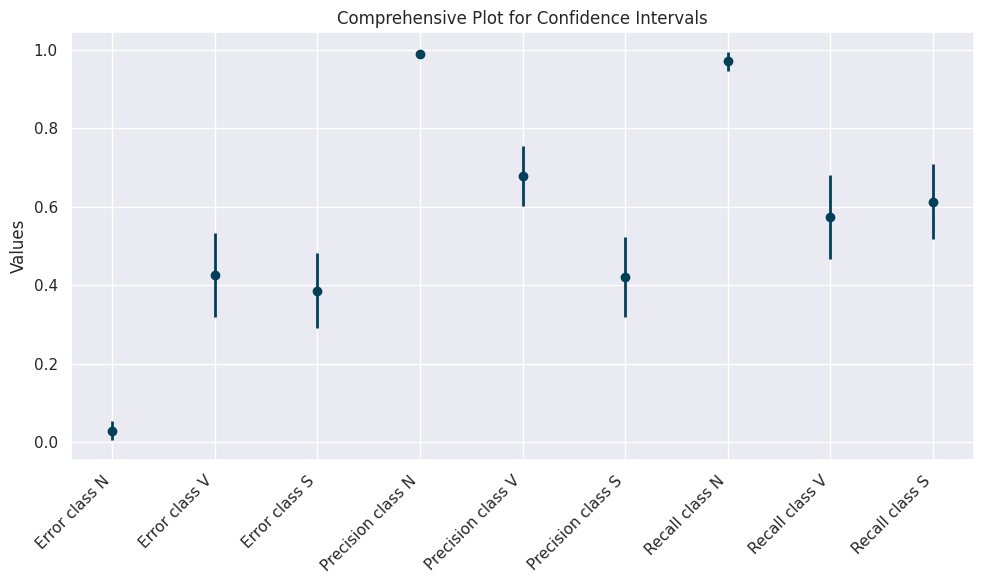

In [ ]:
confidence_intervals = [conf_error_N, conf_error_V, conf_error_S, conf_precision_N,
                         conf_precision_V, conf_precision_S, conf_recall_N, conf_recall_V, conf_recall_S]
labels = ['Error class N', 'Error class V', 'Error class S', 'Precision class N', 'Precision class V',
          'Precision class S', 'Recall class N', 'Recall class V', 'Recall class S']

# Plot all six intervals in a single plot with labels on the x-axis
fig, ax = plt.subplots(figsize=(10, 6))

x_positions = range(len(confidence_intervals))
for i, (conf_interval, label) in enumerate(zip(confidence_intervals, labels)):
    ax.scatter([i], [conf_interval['Mean']], color=colors_palette[0], marker='o')
    ax.vlines([i], conf_interval['Inf'], conf_interval['Sup'], color=colors_palette[0], linewidth=2)

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate and adjust the alignment for better visibility
ax.set_title('Comprehensive Plot for Confidence Intervals')
ax.set_ylabel('Values')
plt.tight_layout()
plt.grid(True)

#plt.show()
plt.savefig("plots/NvsVvsAConfidenceIntervals.png", dpi=300)